In [110]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
# from sklearn.externals import joblib#Predict popularity of song based on characteristics 
df = pd.read_csv('data/data.csv')

In [111]:
df

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.98200,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.6650,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.73200,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.1600,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.96100,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.1010,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.96700,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.3810,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.95700,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.2290,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,0.6080,2020,0.08460,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",0.786,301714,0.808,0,0KkIkfsLEJbrcIhYsCL7L5,0.000289,7,0.0822,-3.702,1,China,72,2020-05-29,0.0881,105.029
170649,0.7340,2020,0.20600,['Ashnikko'],0.717,150654,0.753,0,0OStKKAuXlxA0fMH54Qs6E,0.000000,7,0.1010,-6.020,1,Halloweenie III: Seven Days,68,2020-10-23,0.0605,137.936
170650,0.6370,2020,0.10100,['MAMAMOO'],0.634,211280,0.858,0,4BZXVFYCb76Q0Klojq4piV,0.000009,4,0.2580,-2.226,0,AYA,76,2020-11-03,0.0809,91.688
170651,0.1950,2020,0.00998,['Eminem'],0.671,337147,0.623,1,5SiZJoLXp3WOl3J4C8IK0d,0.000008,2,0.6430,-7.161,1,Darkness,70,2020-01-17,0.3080,75.055


In [3]:
df.columns

Index(['valence', 'year', 'acousticness', 'artists', 'danceability',
       'duration_ms', 'energy', 'explicit', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'mode', 'name', 'popularity', 'release_date',
       'speechiness', 'tempo'],
      dtype='object')

In [137]:
#Measure accuracy of model depending on genre being present 
X = df[['valence','acousticness','danceability','energy','loudness','speechiness','tempo']]

In [138]:
def popularity_category(pop):
    #Low pop lower 25% of data
    if pop <= 11:
        return 0
    #Average between low and popular
    elif pop > 11 and pop < 48:
        return 1
    #Popular: More popular than 75% of all songs right now
    else:
        return 2
def get_decade(year):
    str_year = str(year)[:-1] + '0'
    return int(str_year)
y = df['year'].apply(get_decade)
y

0         1920
1         1920
2         1920
3         1920
4         1920
          ... 
170648    2020
170649    2020
170650    2020
170651    2020
170652    2020
Name: year, Length: 170653, dtype: int64

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)

#Define the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
#joblib.dump(model, 'spotify-recommender.joblib')

predictions = model.predict(X_test)
#Parameters: Expected values, values provided from the model

score = accuracy_score(y_test, predictions)
score

0.2956842752922563

In [165]:
cls = BaggingClassifier(model).fit(
   X_train, y_train)
cls.score(X_test, y_test)

0.3557176760130087

In [166]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2)
extra_tree = DecisionTreeClassifier()
# cls = BaggingClassifier(extra_tree).fit(
#    X_train, y_train)
# cls.score(X_test, y_test)
print("hi")


hi


In [167]:
extra_tree.fit(X_train, y_train)
predictions = model.predict(X_test)
#Parameters: Expected values, values provided from the model

score = accuracy_score(y_test, predictions)
score

0.8575195570009668

In [65]:
#I give you song characterstics and you return their predicted popularity

In [66]:
## Song/Genre suggestor 

#Take in spotify data
# Avg it

# Calculate uniqueness score potentially?
# Suggest eras their music tastes come from

# 

# return genres that most match them and songs from there (sorted by popularity)
    # Take difference between every genre and 1- diff to get % match

In [118]:
year_df = df[['year','valence','acousticness','danceability','energy','loudness','speechiness','tempo']]
year_df = year_df.set_index('year')
example_data = year_df.loc[1999]
pred = model.predict([list(example_data)])
pred

array([1990])

In [130]:
songs_df = pd.read_csv('data/data.csv')
songs_df = songs_df[['year','valence','acousticness','danceability','energy','loudness','speechiness','tempo']]
actual = songs_df['year'].apply(get_decade)
inputs = songs_df[['valence','acousticness','danceability','energy','loudness','speechiness','tempo']]
pred = model.predict(inputs)

In [133]:
score = accuracy_score(pred, list(actual))
score

0.16876937411003615

In [77]:
###### PCA Kmeans on data #####
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans # Our clustering algorithm
from sklearn.decomposition import PCA # Needed for dimension reduction
from sklearn.datasets import load_wine # Dataset that I will be using
import matplotlib.pyplot as plt # Plotting 
import pandas as pd # Storing data convenieniently
# features = df[['valence','acousticness', 'danceability',
#        'duration_ms', 'energy', 'instrumentalness', 'key',
#        'liveness', 'loudness',
#        'speechiness', 'tempo']]
features = df[['instrumentalness', 'speechiness', 'valence']]
features_norm = MinMaxScaler().fit_transform(features) # normalizing the data 

In [78]:
pca = PCA()
pca.fit(features_norm)
evr = pca.explained_variance_ratio_
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        n_comps = i + 1
        break
print(n_comps)

2


In [79]:
pca = PCA(n_components=  n_comps)
principalComponents = pca.fit_transform(features_norm)
features_norm

array([[8.78000000e-01, 3.77319588e-02, 5.94000000e-02],
       [0.00000000e+00, 4.27835052e-01, 9.63000000e-01],
       [9.13000000e-01, 3.49484536e-02, 3.94000000e-02],
       ...,
       [8.56000000e-06, 8.34020619e-02, 6.37000000e-01],
       [7.55000000e-06, 3.17525773e-01, 1.95000000e-01],
       [4.71000000e-03, 1.11340206e-01, 6.42000000e-01]])

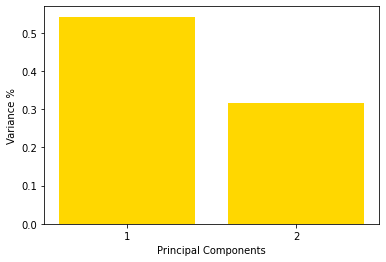

In [80]:
# Plotting the variances for each PC
PC = range(1, pca.n_components_+1)
plt.bar(PC, pca.explained_variance_ratio_, color='gold')
plt.xlabel('Principal Components')
plt.ylabel('Variance %')
plt.xticks(PC)

# Putting components in a dataframe for later
PCA_components = pd.DataFrame(principalComponents)

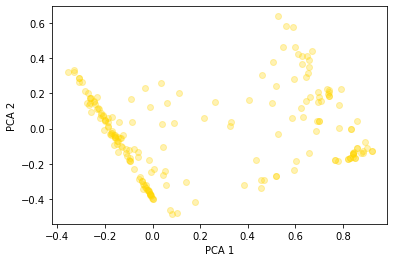

In [81]:
plt.scatter(PCA_components[0][0:200], PCA_components[1][0:200], alpha=.3, color='gold')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

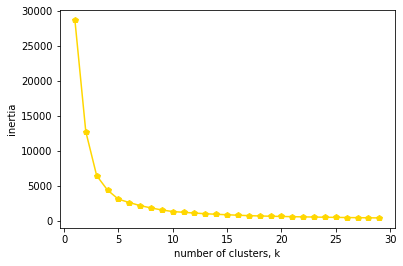

In [107]:
inertias = []

# Creating 10 K-Mean models while varying the number of clusters (k)
for k in range(1,30):
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(range(1,30), inertias, '-p', color='gold')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks(ks)
plt.show()

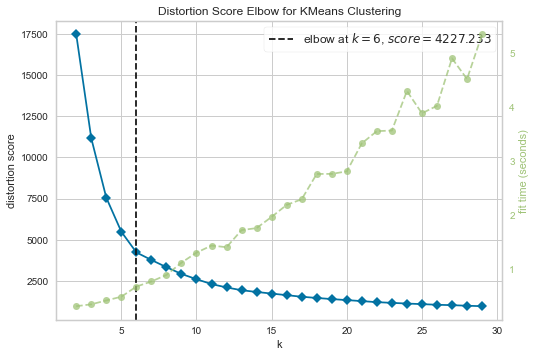

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [109]:
# Elbow Method for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(features_norm)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

In [83]:
inertias

[28688.89099524259,
 12773.898716563846,
 6473.817443952863,
 4405.423379144005,
 3105.1994585134876,
 2629.7296240045225,
 2187.461696971052,
 1860.9739603030025,
 1563.4552354670045]

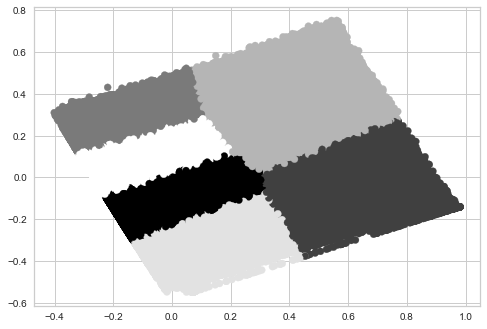

In [112]:
model = KMeans(n_clusters=6)
model.fit(PCA_components.iloc[:,:2])

labels = model.predict(PCA_components.iloc[:,:2])
plt.scatter(PCA_components[0], PCA_components[1], c=labels)
plt.show()

In [114]:
labels

array([4, 3, 4, ..., 0, 1, 0], dtype=int32)

In [115]:
labels = pd.DataFrame(labels)
labeledSongs = pd.concat((features,labels),axis = 1)
labeledSongs = labeledSongs.rename({0:'labels'},axis = 1)

In [116]:
labeledSongs

,instrumentalness,speechiness,valence,labels
0,0.878000,0.0366,0.0594,4
1,0.000000,0.4150,0.9630,3
2,0.913000,0.0339,0.0394,4
3,0.000028,0.0354,0.1650,1
4,0.000002,0.0380,0.2530,1
...,...,...,...,...
170648,0.000289,0.0881,0.6080,0
170649,0.000000,0.0605,0.7340,0
170650,0.000009,0.0809,0.6370,0
170651,0.000008,0.3080,0.1950,1


In [117]:
to_add = set(df.columns) - set(features.columns)
CompleteLabeledSongs = pd.concat((labeledSongs,df[to_add]),axis = 1)
gg = CompleteLabeledSongs.groupby('labels')

In [120]:
gg.get_group(5)

,instrumentalness,speechiness,valence,labels,key,liveness,duration_ms,popularity,tempo,acousticness,loudness,artists,explicit,danceability,energy,mode,id,year,name,release_date
6,0.000000,0.0615,0.406,5,0,0.1150,159507,4,66.221,0.99600,-10.589,['John McCormack'],0,0.518,0.2030,1,5uNZnElqOS3W4fRmRYPk4T,1921,The Wearing of the Green,1921
12,0.000000,0.0546,0.493,5,5,0.2920,190800,0,174.532,0.99000,-12.562,['Georgel'],0,0.315,0.3630,0,0H3k2CvJvHULnWChlbeFgx,1921,La Vipère,1921
14,0.384000,0.0326,0.493,5,7,0.3580,205072,0,159.935,0.01750,-7.298,['Zay Gatsby'],1,0.527,0.6910,1,0MJZ4hh60zwsYleWWxT5yW,1921,Power Is Power,1921-03-27
19,0.001960,0.0750,0.527,5,5,0.0887,122000,0,100.296,0.97100,-16.055,['Christopher Lynch'],0,0.540,0.0848,0,0QU5xT6Mik4vpyt1ItsRXK,1921,A Ballynure Ballad,1921
30,0.000004,0.0443,0.403,5,0,0.4320,166987,0,75.704,0.99200,-20.937,['Ignacio Corsini'],0,0.332,0.1790,1,0y3F8OUDFuB5bpWpXnQi7n,1921,A Mi Palomita - Remasterizado,1921-03-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170636,0.000000,0.1330,0.394,5,10,0.2190,250333,74,140.008,0.20100,-3.332,"['Myke Towers', 'Maluma', 'Farruko']",1,0.775,0.6330,0,70zg99pT51vB4wlMS7e4q7,2020,La Playa - Remix,2020-01-03
170637,0.000199,0.2680,0.329,5,10,0.0904,146688,68,94.525,0.10900,-8.006,['LPB Poody'],1,0.903,0.6110,0,1FgPyHX7HruKDL4Tx4MeZB,2020,Address It,2020-05-05
170639,0.000000,0.2910,0.522,5,10,0.3780,177110,62,77.013,0.00861,-5.859,['Pooh Shiesty'],1,0.819,0.6510,0,7w77k7yCaDOMe25fYxnzit,2020,7.62 God,2020-07-03
170644,0.022500,0.0249,0.466,5,7,0.1250,253613,66,103.054,0.31000,-8.480,['Fleet Foxes'],0,0.562,0.6860,1,308prODCCD0O660tIktbUi,2020,Sunblind,2020-09-22
